**IMPORT**

In [198]:
import pandas as pd
import json       
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

**GET THE DATAFRAME**

**df (eleminated)(dummied)**

In [201]:
df=pd.read_pickle("golden_data_reduced_16june.pkl")
X=df.drop(['price'], axis=1).values
y=df['price'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [202]:
df.shape

(14990, 92)

**df2 (not eleminated)(dummied)  to compare results with df**

In [203]:
df2=pd.read_pickle("golden_data_16_june.pkl")
X2=df2.drop(['price'], axis=1).values
y2=df['price'].values
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 0)

In [204]:
df2.shape

(14990, 136)

**df3 (not eleminated)(not dummied) for CATBOOST**

In [222]:
df3=pd.read_pickle("golden_data_not_dummied.pkl")
df3=df3.drop([14994, 14993, 14992, 14991])
X3=df3.drop(['price'], axis=1)
y3=df['price']
from sklearn.model_selection import train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size = 0.2, random_state = 0)

In [207]:
df3.shape

(14990, 98)

**df4 (extra eleminated)(dummied)**

In [264]:
df4=pd.read_pickle("golden_data_reduced2_01aug.pkl")
X4=df4.drop(['price'], axis=1)
y4=df['price']
from sklearn.model_selection import train_test_split
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size = 0.2, random_state = 0)

In [272]:
df4.shape

(14990, 76)

In [208]:
#We'll use df for RF, XGBOOST, LGB and Deep Learning. But we'll use df3 for CATBOOST. 
#We'll use df2 to compare some of the model result which are already tested with df.

**1.RF (92 columns)**

In [247]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=100, random_state=10)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=10, verbose=0, warm_start=False)

In [248]:
print(regressor.score(X_test,y_test))

0.955957083296823


In [249]:
from sklearn.metrics import mean_absolute_error
y_pred = regressor.predict(X_test)
mean_absolute_error(y_test, y_pred)

863.6365607624973

**cross validation**

In [ ]:
from sklearn.model_selection import cross_val_score
accuraries = cross_val_score(estimator=regressor, X=X_train, y=y_train, cv=10)

In [332]:
accuraries.mean()

0.9527053689703878

**RF with df2  (136 columns)**

In [213]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=100, random_state=10)
regressor.fit(X_train2, y_train2)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=10, verbose=0, warm_start=False)

In [215]:
y_pred = regressor.predict(X_test2)
r2_score(y_test2, y_pred)

0.9566950541099638

In [216]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test2, y_pred)

858.0681262383481

**2. XG BOOST (92 columns)**

In [217]:
import xgboost
model = xgboost.XGBRegressor()
from sklearn.model_selection import train_test_split
model.fit(X_train, y_train)

[01:54:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [218]:
model.score(X_test, y_test)

0.9311136902733889

In [219]:
y_pred = model.predict(X_test)

In [220]:
mean_absolute_error(y_test, y_pred)

1255.3685349152038

**XG BOOST with df2 (136 columns)**

In [250]:
import xgboost
model = xgboost.XGBRegressor()
from sklearn.model_selection import train_test_split
model.fit(X_train2, y_train2)

[02:15:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [252]:
model.score(X_test2, y_test2)

0.9340952852755392

In [253]:
y_pred = model.predict(X_test2)

In [254]:
mean_absolute_error(y_test2, y_pred)

1217.1136413533502

**3. CATBOOST (98 columns)**

In [223]:
from catboost import CatBoostRegressor
categorical_features_indices = np.where(X3.dtypes != np.float)[0]
clf = CatBoostRegressor()
clf.fit(X_train3, y_train3, cat_features=categorical_features_indices)

0:	learn: 18630.9392976	total: 51.7ms	remaining: 51.7s
1:	learn: 18110.6932777	total: 108ms	remaining: 53.8s
2:	learn: 17595.0917556	total: 154ms	remaining: 51.3s
3:	learn: 17097.9990142	total: 223ms	remaining: 55.5s
4:	learn: 16611.3036071	total: 279ms	remaining: 55.5s
5:	learn: 16147.8498291	total: 331ms	remaining: 54.8s
6:	learn: 15696.4351289	total: 362ms	remaining: 51.4s
7:	learn: 15264.8628144	total: 414ms	remaining: 51.3s
8:	learn: 14836.7763317	total: 480ms	remaining: 52.8s
9:	learn: 14424.7288063	total: 539ms	remaining: 53.4s
10:	learn: 14023.0092818	total: 615ms	remaining: 55.3s
11:	learn: 13635.8000172	total: 687ms	remaining: 56.5s
12:	learn: 13263.7089157	total: 753ms	remaining: 57.2s
13:	learn: 12899.6966012	total: 816ms	remaining: 57.5s
14:	learn: 12554.6185933	total: 871ms	remaining: 57.2s
15:	learn: 12207.7650724	total: 931ms	remaining: 57.3s
16:	learn: 11879.6027852	total: 971ms	remaining: 56.1s
17:	learn: 11559.6860209	total: 1.02s	remaining: 55.9s
18:	learn: 11242.88

In [224]:
from sklearn.metrics import r2_score
y_pred3 = clf.predict(X_test3)
r2_score(y_test3, y_pred)

0.9311136902733889

In [225]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test3, y_pred3)

1326.2347190175954

**4.LGBM (92 columns)**

In [226]:
import lightgbm

In [227]:
train_data = lightgbm.Dataset(X_train, label=y_train)
test_data = lightgbm.Dataset(X_test, label=y_test)

In [228]:
params={'metric' : 'l1'}

In [229]:
model_lgbm = lightgbm.train(params,
                       train_data,
                       valid_sets=test_data,
                       num_boost_round=5000,
                       early_stopping_rounds=100)

[1]	valid_0's l1: 4951.81
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l1: 4532.63
[3]	valid_0's l1: 4162.72
[4]	valid_0's l1: 3832.91
[5]	valid_0's l1: 3535.66
[6]	valid_0's l1: 3263.6
[7]	valid_0's l1: 3029.22
[8]	valid_0's l1: 2817.16
[9]	valid_0's l1: 2637.58
[10]	valid_0's l1: 2464.68
[11]	valid_0's l1: 2319.1
[12]	valid_0's l1: 2183.45
[13]	valid_0's l1: 2061.8
[14]	valid_0's l1: 1954.3
[15]	valid_0's l1: 1862.97
[16]	valid_0's l1: 1776.28
[17]	valid_0's l1: 1700.64
[18]	valid_0's l1: 1632.97
[19]	valid_0's l1: 1573.65
[20]	valid_0's l1: 1521.53
[21]	valid_0's l1: 1472.81
[22]	valid_0's l1: 1431.28
[23]	valid_0's l1: 1392.43
[24]	valid_0's l1: 1360.92
[25]	valid_0's l1: 1334.64
[26]	valid_0's l1: 1307.82
[27]	valid_0's l1: 1286.26
[28]	valid_0's l1: 1265.63
[29]	valid_0's l1: 1250.17
[30]	valid_0's l1: 1235.16
[31]	valid_0's l1: 1222.16
[32]	valid_0's l1: 1208.95
[33]	valid_0's l1: 1198.22
[34]	valid_0's l1: 1184.19
[35]	valid_0's l1: 1174.44
[36]	

In [230]:
from sklearn.metrics import r2_score
y_pred = model_lgbm.predict(X_test)
r2_score(y_test, y_pred)

0.9569139718006007

In [231]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

866.5634219366598

**LGBM with df2 (136 columns)**

In [232]:
train_data = lightgbm.Dataset(X_train2, label=y_train2)
test_data = lightgbm.Dataset(X_test2, label=y_test2)

In [233]:
params={'metric' : 'l1'}

In [234]:
model_lgbm = lightgbm.train(params,
                       train_data,
                       valid_sets=test_data,
                       num_boost_round=5000,
                       early_stopping_rounds=100)

[1]	valid_0's l1: 4942.99
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l1: 4517.41
[3]	valid_0's l1: 4144.13
[4]	valid_0's l1: 3807.63
[5]	valid_0's l1: 3497.32
[6]	valid_0's l1: 3227.51
[7]	valid_0's l1: 2988.66
[8]	valid_0's l1: 2779.72
[9]	valid_0's l1: 2595.55
[10]	valid_0's l1: 2431.02
[11]	valid_0's l1: 2284.75
[12]	valid_0's l1: 2143.81
[13]	valid_0's l1: 2026
[14]	valid_0's l1: 1924.74
[15]	valid_0's l1: 1833.87
[16]	valid_0's l1: 1744.12
[17]	valid_0's l1: 1674.73
[18]	valid_0's l1: 1607.31
[19]	valid_0's l1: 1551.09
[20]	valid_0's l1: 1498.13
[21]	valid_0's l1: 1449.86
[22]	valid_0's l1: 1409.46
[23]	valid_0's l1: 1370.91
[24]	valid_0's l1: 1337.35
[25]	valid_0's l1: 1309.74
[26]	valid_0's l1: 1282.99
[27]	valid_0's l1: 1259.88
[28]	valid_0's l1: 1238.23
[29]	valid_0's l1: 1221.71
[30]	valid_0's l1: 1204.94
[31]	valid_0's l1: 1190.34
[32]	valid_0's l1: 1180.24
[33]	valid_0's l1: 1167.88
[34]	valid_0's l1: 1157.92
[35]	valid_0's l1: 1148.63
[36]

In [236]:
from sklearn.metrics import r2_score
y_pred2 = model_lgbm.predict(X_test2)
r2_score(y_test2, y_pred2)

0.9606005733295175

In [237]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test2, y_pred2)

837.2647520901652

**LGBM with df4 (76 columns)**

In [265]:
train_data = lightgbm.Dataset(X_train4, label=y_train4)
test_data = lightgbm.Dataset(X_test4, label=y_test4)

In [266]:
params={'metric' : 'l1'}

In [267]:
model_lgbm = lightgbm.train(params,
                       train_data,
                       valid_sets=test_data,
                       num_boost_round=5000,
                       early_stopping_rounds=100)

[1]	valid_0's l1: 4951.81
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l1: 4532.63
[3]	valid_0's l1: 4162.72
[4]	valid_0's l1: 3832.91
[5]	valid_0's l1: 3535.66
[6]	valid_0's l1: 3263.6
[7]	valid_0's l1: 3029.22
[8]	valid_0's l1: 2817.16
[9]	valid_0's l1: 2637.58
[10]	valid_0's l1: 2464.68
[11]	valid_0's l1: 2317.11
[12]	valid_0's l1: 2183.68
[13]	valid_0's l1: 2063.08
[14]	valid_0's l1: 1959.97
[15]	valid_0's l1: 1862.4
[16]	valid_0's l1: 1779.63
[17]	valid_0's l1: 1698.29
[18]	valid_0's l1: 1632.86
[19]	valid_0's l1: 1575.67
[20]	valid_0's l1: 1519.96
[21]	valid_0's l1: 1475.82
[22]	valid_0's l1: 1433.84
[23]	valid_0's l1: 1397.88
[24]	valid_0's l1: 1364.95
[25]	valid_0's l1: 1336.48
[26]	valid_0's l1: 1311.45
[27]	valid_0's l1: 1290.39
[28]	valid_0's l1: 1269.9
[29]	valid_0's l1: 1251.17
[30]	valid_0's l1: 1236.84
[31]	valid_0's l1: 1222.08
[32]	valid_0's l1: 1206.71
[33]	valid_0's l1: 1195.49
[34]	valid_0's l1: 1184.06
[35]	valid_0's l1: 1174.85
[36]

In [268]:
from sklearn.metrics import r2_score
y_pred = model_lgbm.predict(X_test4)
r2_score(y_test4, y_pred)

0.9551879864292614

In [271]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test4, y_pred)

892.9101351264428

**5.DEEP LEARNING ANN (92 columns)**

In [238]:
import keras 
from keras.models import Sequential
from keras.layers import Dense

In [239]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [240]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(46, kernel_initializer='normal',input_dim = X_train_sc.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(46, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(46, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(optimizer = 'adam', loss = 'mean_absolute_error')
NN_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 46)                4232      
_________________________________________________________________
dense_48 (Dense)             (None, 46)                2162      
_________________________________________________________________
dense_49 (Dense)             (None, 46)                2162      
_________________________________________________________________
dense_50 (Dense)             (None, 1)                 47        
Total params: 8,603
Trainable params: 8,603
Non-trainable params: 0
_________________________________________________________________


In [242]:
history=NN_model.fit(X_train_sc, y_train, epochs=100, batch_size=32, validation_split = 0.2)

Train on 9593 samples, validate on 2399 samples
Epoch 1/100
9593/9593 [==============================] - 2s 163us/step - loss: 13427.6304 - val_loss: 6268.0554
Epoch 2/100
9593/9593 [==============================] - 1s 72us/step - loss: 4641.8317 - val_loss: 3684.7677
Epoch 3/100
9593/9593 [==============================] - 1s 73us/step - loss: 2981.1912 - val_loss: 2507.7608
Epoch 4/100
9593/9593 [==============================] - 1s 70us/step - loss: 2207.3899 - val_loss: 2029.3045
Epoch 5/100
9593/9593 [==============================] - 1s 62us/step - loss: 1856.7202 - val_loss: 1769.1148
Epoch 6/100
9593/9593 [==============================] - 1s 63us/step - loss: 1648.0454 - val_loss: 1619.4096
Epoch 7/100
9593/9593 [==============================] - 1s 67us/step - loss: 1520.9966 - val_loss: 1517.3338
Epoch 8/100
9593/9593 [==============================] - 1s 63us/step - loss: 1424.8368 - val_loss: 1448.4027
Epoch 9/100
9593/9593 [==============================] - 1s 63us/step 

In [243]:
y_pred = NN_model.predict(X_test_sc)
r2_score(y_test, y_pred)

0.9397343896423433

In [244]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

1077.5705343275727

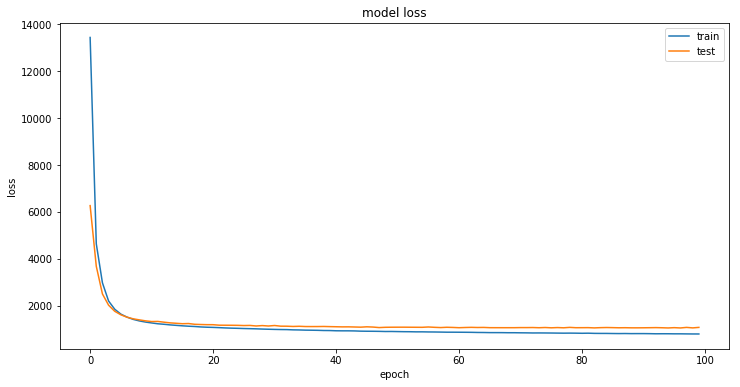

In [245]:
# summarize history for loss   
plt.figure(figsize=(12,6))    
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper right')  
plt.show()  

In [246]:
print(history.history.keys())

dict_keys(['val_loss', 'loss'])


**DEEP LEARNING WITH df2 (136 columns)**

In [256]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc2 = sc.fit_transform(X_train2)
X_test_sc2 = sc.transform(X_test2)

In [257]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(46, kernel_initializer='normal',input_dim = X_train_sc2.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(46, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(46, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(optimizer = 'adam', loss = 'mean_absolute_error')
NN_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 46)                6256      
_________________________________________________________________
dense_52 (Dense)             (None, 46)                2162      
_________________________________________________________________
dense_53 (Dense)             (None, 46)                2162      
_________________________________________________________________
dense_54 (Dense)             (None, 1)                 47        
Total params: 10,627
Trainable params: 10,627
Non-trainable params: 0
_________________________________________________________________


In [258]:
history=NN_model.fit(X_train_sc2, y_train2, epochs=100, batch_size=32, validation_split = 0.2)

Train on 9593 samples, validate on 2399 samples
Epoch 1/100
9593/9593 [==============================] - 2s 164us/step - loss: 13384.7334 - val_loss: 5689.6741
Epoch 2/100
9593/9593 [==============================] - 1s 72us/step - loss: 4234.6210 - val_loss: 3466.8989
Epoch 3/100
9593/9593 [==============================] - 1s 65us/step - loss: 2874.5916 - val_loss: 2579.5342
Epoch 4/100
9593/9593 [==============================] - 1s 65us/step - loss: 2256.5661 - val_loss: 2134.2348
Epoch 5/100
9593/9593 [==============================] - 1s 65us/step - loss: 1920.7423 - val_loss: 1874.7024
Epoch 6/100
9593/9593 [==============================] - 1s 75us/step - loss: 1718.5528 - val_loss: 1712.3334
Epoch 7/100
9593/9593 [==============================] - 1s 84us/step - loss: 1589.2367 - val_loss: 1629.8224
Epoch 8/100
9593/9593 [==============================] - 1s 84us/step - loss: 1488.0459 - val_loss: 1554.5038
Epoch 9/100
9593/9593 [==============================] - 1s 68us/step 

In [259]:
y_pred = NN_model.predict(X_test_sc2)
r2_score(y_test2, y_pred)

0.9447722130806901

In [260]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

1055.967853996577

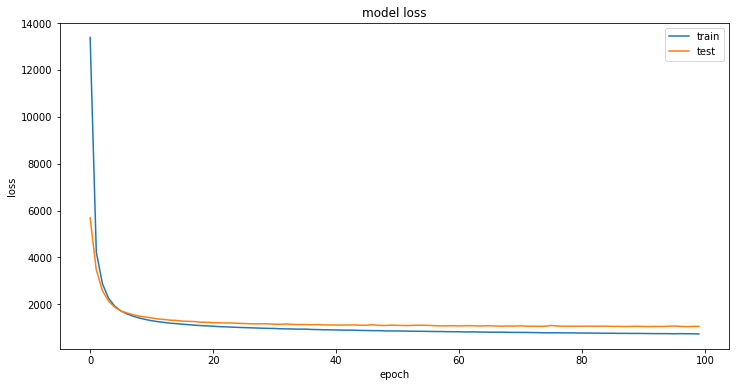

In [261]:
# summarize history for loss   
plt.figure(figsize=(12,6))    
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper right')  
plt.show()  